<a href="https://colab.research.google.com/github/joshbrx/biomath_model/blob/main/ODE_first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random 

\begin{align}
    \frac{d}{dt}I(t) =  -\alpha I(t)
\end{align}

De aquí se desarrollan dos modelos diferentes, el primero es un modelo de **tiempo discreto** con probabilidades:

\begin{align}
    I(t+\Delta t) = I(t) - p_{\Delta t}I(t)
\end{align}

El segundo modelo es de **tiempo continuo** con tasas de evolución temporal (ecuaciones diferenciales)

\begin{align}
    \frac{d}{dt}I(t) =  -\alpha I(t)
\end{align}



---

---



## Sistemas de Primer Orden

Se trata de ecuaciones diferenciales que tienen la siguiente forma general

$$\frac{dy(t)}{dt} = f(y,t)$$

### Derivada Discreta

Para poder estimar la derivada nos valemos del cambio entre dos puntos diferentes: inicial y final

$$\frac{dy(t)}{dt}= \frac{y_f-y_i}{t_f-t_i}$$

En este caso lo podemos aplicar a nuestro modelo de crecimiento microbiano.

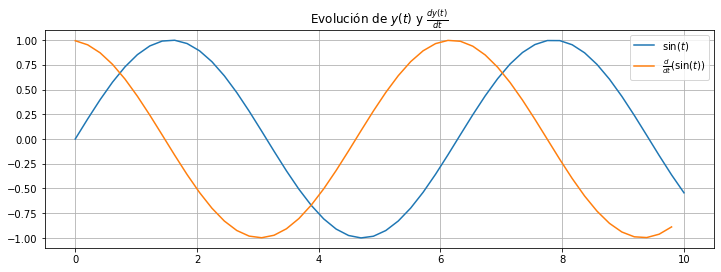

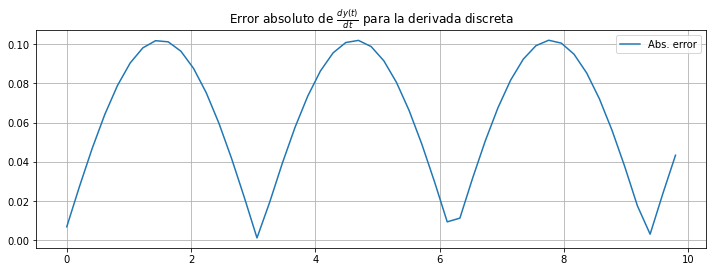

In [55]:
t = np.linspace(0,10);
y = np.sin(t);

def derivada_discreta(y,t, equally_spaced=True):
    if len(y) != len(t): print("Los vectores no tienen las mismas dimensiones")
    else:
        dydt = np.empty(len(y))
        if equally_spaced == True:
            dt = t[1] - t[0]
            for i in range(len(y)-1):
                dydt[i] = (y[i+1] - y[i])/dt
        else:
            for i in range(len(y)-1):
                dt = t[i+1] - t[i]
                dydt[i] = (y[i+1] - y[i])/dt
        dydt = dydt[0:-1]
        return dydt

dydt = derivada_discreta(y,t)

plt.figure(figsize=(12,4))
plt.plot(t,y, label=r"$\sin(t)$")
plt.plot(t[0:-1],dydt, label=r"$\frac{d}{dt}\left(\sin(t)\right)$")
plt.title(r"Evolución de $y(t)$ y $\frac{dy(t)}{dt}$")
plt.legend(); plt.grid(); plt.show()

plt.figure(figsize=(12,4))
plt.plot(t[0:-1],abs(np.cos(t[0:-1]) - dydt), label="Abs. error")
plt.title(r"Error absoluto de $\frac{dy(t)}{dt}$ para la derivada discreta")
plt.legend(); plt.grid(); plt.show()

### Método de Euler

Este método surge para aproximar las soluciones a ecuaciones diferenciales de primer orden cuando se conoce como evolucionan.

$$\frac{dy(t)}{dt} = f(y,t),\qquad \Rightarrow y(t) = \int f(y,t) dt$$

Similar al método anterior este metodo radica en la interpolación de la función $dy(t)/dt$ para evolucionar el sistema por lo que solo se necesitan las condiciones iniciales $(y_0, t_0)$ y el ajuste de la derivada en cada paso. 

En este caso consideramos una diferencia de tiempo constante $dt=cte$ por lo que ya no es necesario iterar sobre el tiempo y solo se necesita la condición inicial para poder evolucionar el sistema.


$$y_{n+1} = y_n + \frac{dy(t)}{dt}\bigg|_{t_n}(t_{n+1}-t_n)$$

Finalmente al considerar que estamos trabajando con una distribución de $t$ simétrica se obtiene lo siguiente:

$$y_{n+1} = y_n + \frac{dy(t)}{dt}\bigg|_{t_0 + n\Delta t}\Delta t,\qquad \Delta t = t_n-t_{n-1}=t_1-t_0$$

Volvemos a aplicarlo a nuestra función $y(t) = \sin(t) + c_1$, con $dy/dt=\cos(t)$.

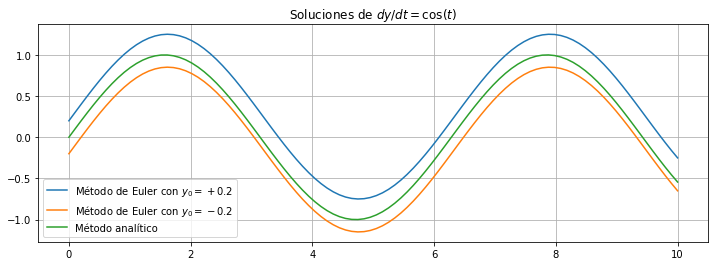

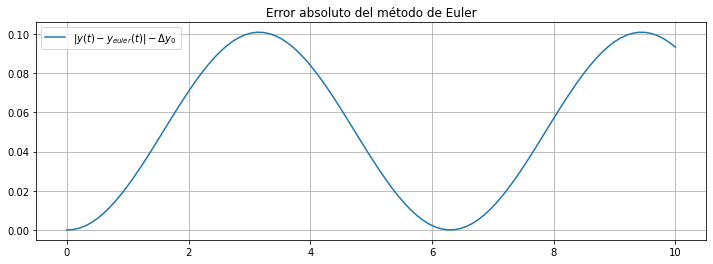

In [59]:
t = np.linspace(0,10, num=100);
dy = np.cos(t);
y0 = 0.2

def euler_solver_data(y0, dy, t, equally_spaced=True):
    if len(dy) != len(t): print("Los vectores no tienen las mismas dimensiones")
    else:
        y = np.empty(len(dy+1))
        y[0] = y0
        if equally_spaced == True:
            dt = t[1] - t[0]; 
            for i in range(len(dy)):
                y[i+1] = y[i] + dy[i] * dt
        else:
            for i in range(len(dy)):
                dt = t[i+1] - t[i];
                y[i+1] = y[i] + dy[t[i]] * dt
        y = y[0:-1]
        return y

y = euler_solver_data(y0, dy, t)
yy = euler_solver_data(-y0, dy, t)

plt.figure(figsize=(12,4))
plt.plot(t,y, label=r"Método de Euler con $y_0=+0.2$")
plt.plot(t,yy, label=r"Método de Euler con $y_0=-0.2$")
plt.plot(t,np.sin(t), label=r"Método analítico")
plt.title(r"Soluciones de $dy/dt=\cos(t)$")
plt.legend(); plt.grid(); plt.show()

plt.figure(figsize=(12,4))
plt.plot(t,abs(y - np.sin(t))-y0, label="$|y(t)-y_{euler}(t)|-\Delta y_0$")
plt.title(r"Error absoluto del método de Euler")
plt.legend(); plt.grid(); plt.show()

También podemos definir la derivada al declararla como función para resolver de manera análoga al cálculo simbólico.

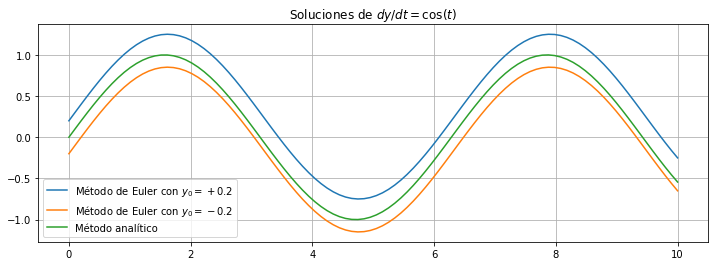

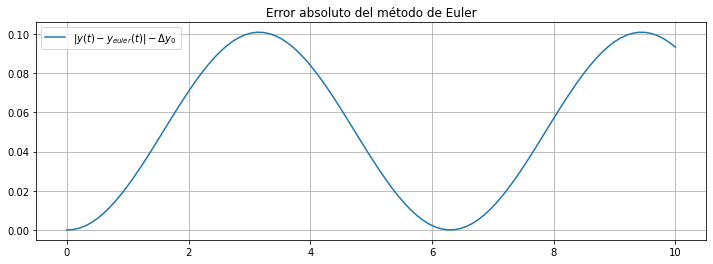

In [61]:
t = np.linspace(0,10, num=100);
dy = lambda x: np.cos(x);
y0 = 0.2

def euler_solver(y0, dy, t, equally_spaced=True):
    y = np.empty(len(t)+1)
    y[0] = y0
    if equally_spaced == True:
        dt = t[1] - t[0]; 
        for i in range(len(t)):
            y[i+1] = y[i] + dy(t[i]) * dt
    else:
        for i in range(len(t)):
            dt = t[i+1] - t[i];
            y[i+1] = y[i] + dy(t[i]) * dt
    y = y[0:-1]
    return y

y = euler_solver(y0, dy, t)
yy = euler_solver(-y0, dy, t)

plt.figure(figsize=(12,4))
plt.plot(t,y, label=r"Método de Euler con $y_0=+0.2$")
plt.plot(t,yy, label=r"Método de Euler con $y_0=-0.2$")
plt.plot(t,np.sin(t), label=r"Método analítico")
plt.title(r"Soluciones de $dy/dt=\cos(t)$")
plt.legend(); plt.grid(); plt.show()

plt.figure(figsize=(12,4))
plt.plot(t,abs(y - np.sin(t))-y0, label="$|y(t)-y_{euler}(t)|-\Delta y_0$")
plt.title(r"Error absoluto del método de Euler")
plt.legend(); plt.grid(); plt.show()

## Sistemas de segundo orden

Para ello podemos considerar al modelo básico de depredador presa formulado por Lotka-Volterra que consiste en las siguientes ecuaciones

\begin{align}
    \frac{dP}{dt} = \alpha_1 P - \mu_1 PD\\
    \frac{dD}{dt} = \alpha_2 PD - \mu_2 D 
\end{align}

donde $P$ es el número de presas, $D$ es el número de depredadore, $\alpha_1$ representa el crecimiento de las presas, $\mu_1$ es la tasa de depredación de las presas por los depredadores, $\alpha_2$ es la tasa de crecimiento de los depredadores debido a la efectividad de la caza y $\mu_2$ es la muerte natural de los depredarores.

In [ ]:
Entonces podemos aplicar el método de Euler para sistemas de 2 variables